In [5]:
import prov.model as prov
import datetime

In [6]:
document = prov.ProvDocument()

document.set_default_namespace('http://anotherexample.org/')
document.add_namespace('ex', 'http://example.org/')

e2 = document.entity('e2', (
    (prov.PROV_TYPE, "File"),
    ('ex:path', "/shared/crime.txt"),
    ('ex:creator', "Alice"),
    ('ex:content', "There was a lot of crime in London last month"),
))

a1 = document.activity('a1', datetime.datetime.now(), None, {prov.PROV_TYPE: "edit"})
# References can be qnames or ProvRecord objects themselves
document.wasGeneratedBy(e2, a1, None, {'ex:fct': "save"})
document.wasAssociatedWith('a1', 'ag2', None, None, {prov.PROV_ROLE: "author"})
document.agent('ag2', {prov.PROV_TYPE: 'prov:Person', 'ex:name': "Bob"})

<ProvAgent: ag2>

In [11]:
e3 = document.entity('m1')

In [30]:
e2.hadMember(e3)
e2.hadMember(e3)

<ProvEntity: e2>

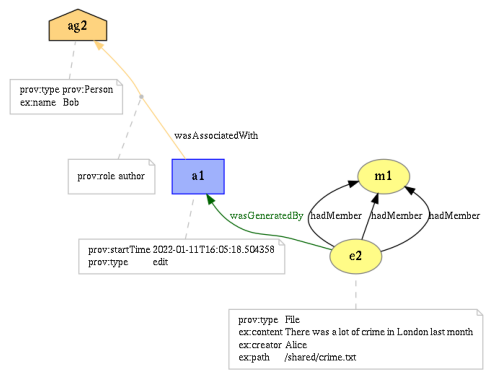

In [31]:
document.plot()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import prov.graph as graph

In [18]:
nx = graph.prov_to_graph(document)

In [19]:
nx

In [22]:
from networkx.drawing.nx_pylab import draw_networkx

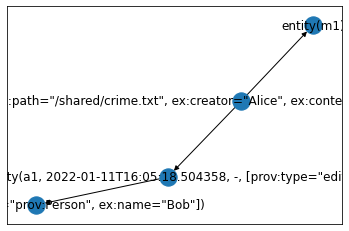

In [23]:
draw_networkx(nx)

In [24]:
nx.nodes

NodeView((<ProvEntity: e2>, <ProvActivity: a1>, <ProvAgent: ag2>, <ProvEntity: m1>))

In [28]:
for node in nx.nodes:
    print(type(node))
    print(node.attributes)

<class 'prov.model.ProvEntity'>
[(<QualifiedName: prov:type>, 'File'), (<QualifiedName: ex:path>, '/shared/crime.txt'), (<QualifiedName: ex:creator>, 'Alice'), (<QualifiedName: ex:content>, 'There was a lot of crime in London last month')]
<class 'prov.model.ProvActivity'>
[(<QualifiedName: prov:startTime>, datetime.datetime(2022, 1, 11, 16, 5, 18, 504358)), (<QualifiedName: prov:type>, 'edit')]
<class 'prov.model.ProvAgent'>
[(<QualifiedName: prov:type>, 'prov:Person'), (<QualifiedName: ex:name>, 'Bob')]
<class 'prov.model.ProvEntity'>
[]


In [27]:
nx.attributes

AttributeError: 'MultiDiGraph' object has no attribute 'attributes'